<a href="https://colab.research.google.com/github/Ron-Wu/Machine-learning-0602/blob/main/0602classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
## latex math 
## https://en.wikibooks.org/wiki/LaTeX/Mathematics

In [18]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
# DataFrame: 表格，Series: 一行/一列
df = pd.DataFrame(iris["data"], 
          columns = iris["feature_names"])

df["ans"] = iris["target"]

# 將表格轉成 csv 表格
df.to_csv("iris.csv", encoding="utf-8", index = False)

# g 使用jupyter的方法印出
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
# sklearn前: pandas.DataFrame
# sklearn後: np.array
import numpy as np
from sklearn.model_selection import train_test_split
x,y = np.array(df.drop(["ans"], axis = 1)), np.array(df["ans"])
# 90% x, 10% x, 90% y, 10% y
x_train, x_test, y_train, y_test = train_test_split(x,
                             y,
                             test_size = 0.1 )

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(558.0, 996.6, 'petal width (cm) <= 0.75\ngini = 0.666\nsamples = 135\nvalue = [45, 47, 43]\nclass = versicolor'),
 Text(472.15384615384613, 815.4000000000001, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]\nclass = setosa'),
 Text(643.8461538461538, 815.4000000000001, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 90\nvalue = [0, 47, 43]\nclass = versicolor'),
 Text(343.38461538461536, 634.2, 'petal length (cm) <= 4.95\ngini = 0.177\nsamples = 51\nvalue = [0, 46, 5]\nclass = versicolor'),
 Text(171.69230769230768, 453.0, 'petal width (cm) <= 1.65\ngini = 0.043\nsamples = 45\nvalue = [0, 44, 1]\nclass = versicolor'),
 Text(85.84615384615384, 271.79999999999995, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]\nclass = versicolor'),
 Text(257.53846153846155, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(515.0769230769231, 453.0, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(429.23076

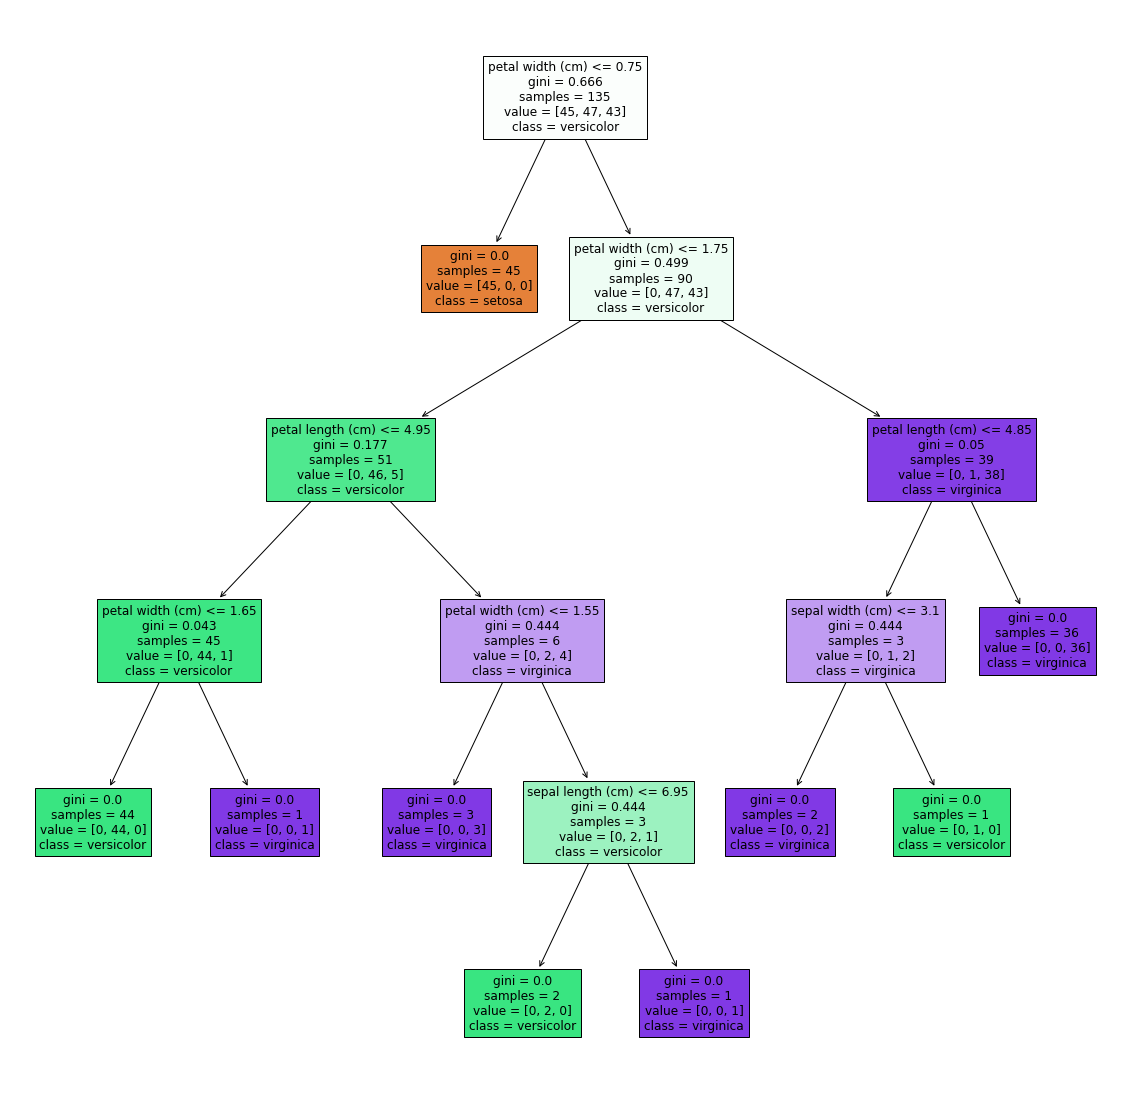

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 可以調整 plot_tree 顯示出來的大小
plt.figure(figsize = (20, 20))

plot_tree(clf,
     feature_names = iris["feature_names"],
     class_names = iris["target_names"],
     filled = True)